In [102]:
import spacy
import json
import random
import matplotlib.pyplot as plt
import numpy as np
from spacy.training.example import Example
from spacy.util import minibatch, compounding

In [67]:
TRAIN = json.load(open("./training_data.txt", 'r'))

In [103]:
avg_loss = []

In [101]:
def train_spacy(data, iterations):
    TRAIN_DATA = data
    nlp = spacy.blank("en")
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe("ner", last=True)
    for _, annotations in TRAIN_DATA:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2]) # grab label of each entity
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):
        optimizer = nlp.begin_training()
        for itn in range(iterations):
            print("Starting Iteartion " + str(itn))
            random.shuffle(TRAIN_DATA)
            losses = {}
            ner_loss = []
            for batch in minibatch(TRAIN_DATA, size=2):
                for text, annotations in batch:
                    doc = nlp.make_doc(text)
                    example = Example.from_dict(doc, annotations)
                    nlp.update([example], drop=0.2, sgd=optimizer, losses=losses)
                    ner_loss.append(losses['ner'])
            print(losses)
            avg_loss.append(np.mean(ner_loss))
    return (nlp)

In [104]:
nlp = train_spacy(TRAIN[:100], 30)

Starting Iteartion 0


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "SARS-CoV-2 infection in children: Transmission dyn..." with entities "[[0, 10, 'CORONAVIRUS'], [34, 55, 'DATE'], [90, 95...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Preliminary Identification of Potential Vaccine Ta..." with entities "[[40, 47, 'CHEMICAL'], [64, 72, 'CORONAVIRUS'], [7...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Li Wenliang, a face to the frontline healthcare wo..." with entities "[[0, 11, 'CHEMICAL'], [27, 47, 'CHEMICAL'], [60, 6...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "First two months of the 2019 Coronavirus Disease (..." with entities "[[0, 16, 'DATE'], [24, 28, 'DATE'], [29, 40, 'CORO...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Potential Factors Influencing Repeated SARS Outbre..." with entities "[[39, 43, 'CORONAVIRUS'], [57, 62, 'CELL'], [70, 8...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Potential Rapid Diagnostics, Vaccine and Therapeut..." with entities "[[29, 36, 'CHEMICAL'], [41, 53, 'CHEMICAL'], [58, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Statistics-Based Predictions of Coronavirus Epidem..." with entities "[[32, 43, 'CORONAVIRUS'], [66, 80, 'GPE'], [156, 1...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Initial Cluster of Novel Coronavirus (2019-nCoV) I..." with entities "[[25, 36, 'CORONAVIRUS'], [38, 47, 'CORONAVIRUS'],...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/Library/Frameworks/Python.framework/Version

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "The coronavirus 2019-nCoV epidemic: Is hindsight 2..." with entities "[[4, 15, 'CORONAVIRUS'], [16, 25, 'CORONAVIRUS'], ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/spacy/training/iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Overview of The 2019 Novel Coronavirus (2019-nCoV)..." with entities "[[16, 20, 'DATE'], [27, 38, 'CORONAVIRUS'], [40, 4...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
/Library/Frameworks/Python.framework/Version

{'ner': 58818.597574239786}
Starting Iteartion 1
{'ner': 26913.756324801034}
Starting Iteartion 2
{'ner': 23044.042659162278}
Starting Iteartion 3
{'ner': 21094.944373297058}
Starting Iteartion 4
{'ner': 19389.83291924048}
Starting Iteartion 5
{'ner': 17969.990007530025}
Starting Iteartion 6
{'ner': 16996.732758330563}
Starting Iteartion 7
{'ner': 16295.798122948454}
Starting Iteartion 8
{'ner': 15631.978949655424}
Starting Iteartion 9
{'ner': 14891.988244065697}
Starting Iteartion 10
{'ner': 14144.384441489208}
Starting Iteartion 11
{'ner': 13953.364652733639}
Starting Iteartion 12
{'ner': 13297.456715776874}
Starting Iteartion 13
{'ner': 13040.080192239322}
Starting Iteartion 14
{'ner': 12798.897225480887}
Starting Iteartion 15
{'ner': 12378.160235265046}
Starting Iteartion 16
{'ner': 12328.924211590795}
Starting Iteartion 17
{'ner': 12010.20206723769}
Starting Iteartion 18
{'ner': 11487.84078584964}
Starting Iteartion 19
{'ner': 11301.288410723439}
Starting Iteartion 20
{'ner': 1122

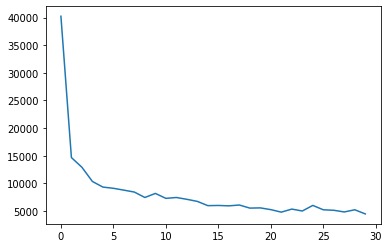

In [105]:
plt.plot(avg_loss, label="losses")
plt.show()

In [40]:
from spacy import displacy

In [80]:
doc = nlp(TRAIN[3][0])

In [81]:
displacy_image = displacy.render(doc, jupyter=True,style='ent')

In [37]:
len(TRAIN)

1001